In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('case1Data.csv')
data_xnew = pd.read_csv('case1Data_Xnew.csv')

# Display the first few rows of the data
print(data.head())
print(data_xnew.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the response variable Y
sns.histplot(data['y'], kde=True)
plt.title('Distribution of Response Variable Y')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

        y      x_01  x_02  x_03      x_04      x_05  x_06  x_07      x_08  \
y     1.0       NaN   NaN   NaN       NaN       NaN   NaN   NaN       NaN   
x_01  NaN  1.000000   NaN   NaN  0.514581  0.506417   NaN   NaN  0.501228   
x_02  NaN       NaN   1.0   NaN       NaN       NaN   NaN   NaN       NaN   
x_03  NaN       NaN   NaN   1.0       NaN       NaN   NaN   NaN       NaN   
x_04  NaN  0.514581   NaN   NaN  1.000000       NaN   NaN   NaN       NaN   
...   ...       ...   ...   ...       ...       ...   ...   ...       ...   
C_01  NaN       NaN   NaN   NaN       NaN       NaN   NaN   NaN       NaN   
C_02  NaN       NaN   NaN   NaN       NaN       NaN   NaN   NaN       NaN   
C_03  NaN       NaN   NaN   NaN       NaN       NaN   NaN   NaN       NaN   
C_04  NaN       NaN   NaN   NaN       NaN       NaN   NaN   NaN       NaN   
C_05  NaN       NaN   NaN   NaN       NaN       NaN   NaN   NaN       NaN   

          x_09  ...      x_91  x_92  x_93      x_94      x_95  C_01  C_02  

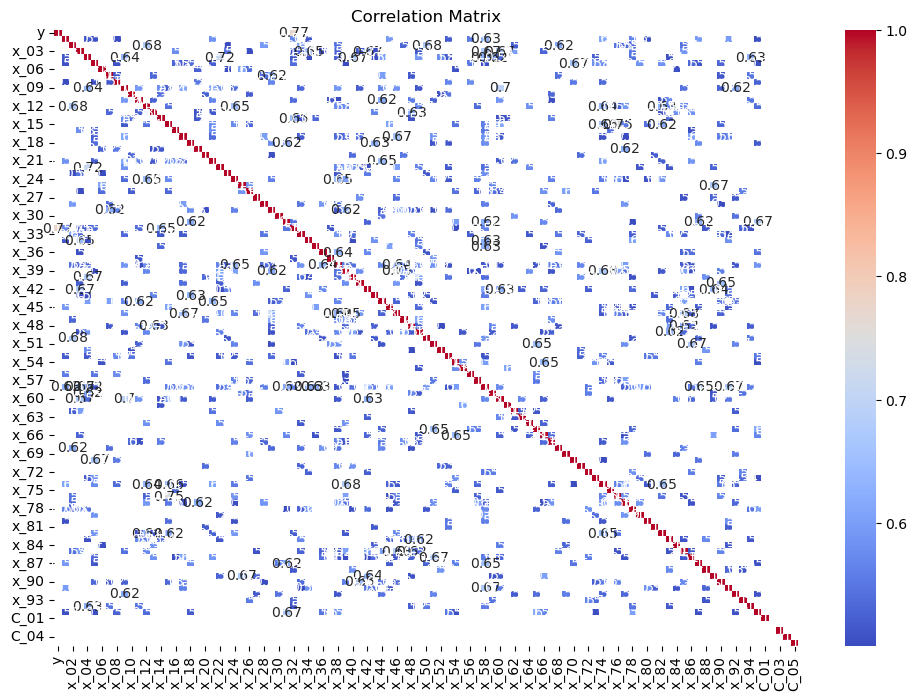

In [6]:
# test if corr is significant
high_corr = corr_matrix[abs(corr_matrix) > 0.5]
print(high_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Option 1: Remove rows with missing values
data_dropped_rows = data.dropna()
print("Data after dropping rows with missing values:\n", data_dropped_rows)

# Option 2: Remove columns with missing values
data_dropped_columns = data.dropna(axis=1)
print("Data after dropping columns with missing values:\n", data_dropped_columns)


In [ ]:

# Option 3: Fill missing values with a specific value (e.g., 0)
data_filled_zeros = data.fillna(0)
print("Data after filling missing values with 0:\n", data_filled_zeros)


In [ ]:

# Option 4: Fill missing values with the mean of the column
data_filled_mean = data_scaled.fillna(data_scaled.mean())
print("Data after filling missing values with column mean:\n", data_filled_mean)


In [ ]:

# Option 5: Interpolate missing values
data_interpolated = data.interpolate()
print("Data after interpolating missing values:\n", data_interpolated)
# Check for missing values

In [ ]:
missing_values = data_interpolated.isnull().sum()
print("Missing values in each column:\n", missing_values)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_interpolated.drop(columns=['y']))

# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])

# Compute the correlation matrix of the principal components
corr_matrix_pca = principal_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_pca, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Principal Components')
plt.show()